In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style='whitegrid')

# Tiền xử lý

In [2]:
df = pd.read_csv('covid.csv', index_col=0)
new_df = df.loc[:, ~df.columns.isin(['New Cases', 'New Deaths', 'New Recovered'])]
# Remove rows with 60% or greater missing values
new_df = new_df[df.isna().sum(axis=1) / len(df.columns) < 0.4]
new_df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region
0,India,43072486,523753.0,42530622.0,18111.0,698.0,30664,373.0,836945383.0,595826.0,1404680388,Asia
1,S. Korea,17194616,22724.0,NaN,NaN,526.0,334855,443.0,15804065.0,307775.0,51349433,Asia
2,Turkey,15028397,98751.0,14927975.0,1671.0,975.0,174770,1148.0,158778055.0,1846480.0,85989599,Asia
3,Vietnam,10644700,43038.0,9245528.0,1356134.0,594.0,107597,435.0,85796776.0,867234.0,98931474,Asia
4,Japan,7813849,29506.0,7356289.0,428054.0,173.0,62127,235.0,48589480.0,386329.0,125772339,Asia


## Thêm cột mới

### Thêm các cột về tỷ lệ

In [3]:
new_df['Death rate'] = new_df['Total Deaths'] / new_df['Total Cases']
new_df['Recovery rate'] = new_df['Total Recovered'] / new_df['Total Cases']
new_df['Active rate'] = new_df['Active Cases'] / new_df['Total Cases']
new_df['Serious rate'] = new_df['Serious, Critical'] / new_df['Total Cases']
new_df['Cases per test'] = new_df['Total Cases'] / new_df['Total Tests']

### Thêm mã quốc gia

In [4]:
# Country codes
to_country_code = json.loads(open('country-codes.json','r').read())['Country Code']
new_df['Country Code'] = new_df['Country'].apply(lambda x: to_country_code[x])

# Histogram

Biểu đồ dưới đây thể hiện sự phân bố về tổng số ca mắc và tổng số lượt test của các quốc gia trên thế giới sử dụng histogram. Có thể thấy phân bố của cả hai thuộc tính đều bị lệch dương khá nhiều, trong đó cả hai đều có những trường hợp có giá trị rất lớn.

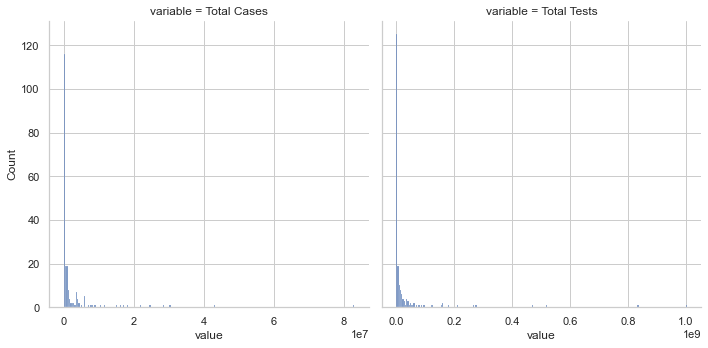

In [5]:
f = sns.FacetGrid(
    data=new_df[['Total Cases', 'Total Tests']].melt(),
    col='variable',
    sharex=False,
    height=5,
)

f.map_dataframe(sns.histplot, x='value')
plt.show()

Biểu đồ histogram dưới đây thể hiện sự phân bố về tổng ca hồi phục, ca tử vong và số ca còn điều trị của các quốc gia trên thế giới. Một lần nữa ta cũng thấy cả ba thuộc tính đều có phân bố lệch dương, các thuộc tính hầu hết tập trung chủ yếu ở các giá trị nhỏ.

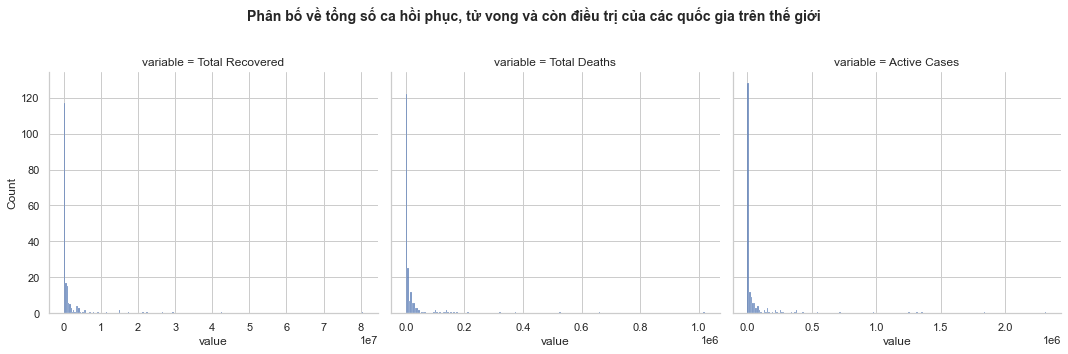

In [6]:
f = sns.FacetGrid(
    data=new_df[['Total Recovered', 'Total Deaths', 'Active Cases']].melt(),
    col='variable',
    sharex=False,
    height=5,
)

f.map_dataframe(sns.histplot, x='value')
f.fig.subplots_adjust(top=0.8)
f.fig.suptitle(
    t='Phân bố về tổng số ca hồi phục, tử vong và còn điều trị của các quốc gia trên thế giới',
    fontsize=14,
    fontweight='bold'
)
plt.show()

# Box plot

## `Recovery rate`, `Death rate` và `Active rate`

Biểu đồ dưới đây thể hiện sự phân bố về tỷ lệ hồi phục, tỷ lệ tử vong, tỷ lệ các ca còn đang mắc của các quốc gia trên thế giới. Ở đây ta dùng biểu đồ box plot vì ta đang khảo sát về phân bố của các trường có kiểu dữ liệu số. Hơn nữa, vì cả ba thuộc tính đều có cùng đơn vị là phần trăm, và `Recovery rate` + `Death rate` + `Active rate` = 100% nên ta trực quan bằng ba biểu đồ box plot có cùng scale ở trục x.

Nhìn chung, hầu hết các quốc gia trên thế giới đều đã kiểm soát tốt các ca mắc của nước mình: phần lớn các quốc gia đều có tỷ lệ hồi phục ở mức cao quanh 90-100%, tỷ lệ các ca còn điều trị ở quanh mức dưới 10%. Tỷ lệ tử vong là thấp nhất trong số các tỷ lệ, trung bình 1.4% khả năng tử vong trên mỗi ca mắc (xem boxplot phía dưới để thấy rõ hơn).

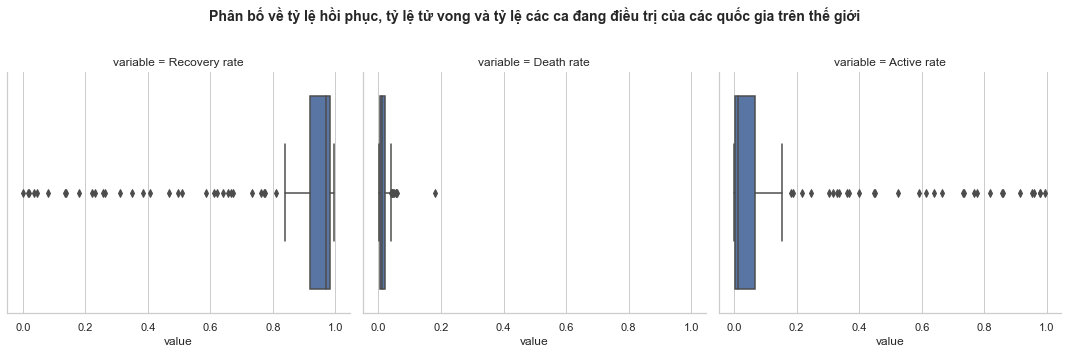

In [7]:
rate_fg = sns.FacetGrid(
    data=new_df[['Recovery rate', 'Death rate', 'Active rate']].melt(),
    col='variable',
    height=5
)
rate_fg.map_dataframe(sns.boxplot, x='value')
rate_fg.fig.subplots_adjust(top=0.8)
rate_fg.fig.suptitle(
    'Phân bố về tỷ lệ hồi phục, tỷ lệ tử vong và tỷ lệ các ca đang điều trị của các quốc gia trên thế giới',
    fontweight='bold',
    fontsize=14,
)

plt.show()

Tỷ lệ tử vong trong số các ca mắc COVID của các quốc gia dao động quanh mức 1%.

Mean death rate: 0.014075326144877802
Median death rate: 0.010070048238535315


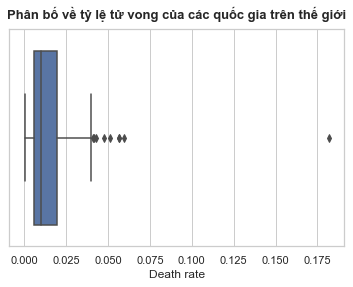

In [8]:
print(f"Mean death rate: {new_df['Death rate'].mean()}")
print(f"Median death rate: {new_df['Death rate'].median()}")

ax = sns.boxplot(data=new_df, x='Death rate')
ax.set_title(
    label='Phân bố về tỷ lệ tử vong của các quốc gia trên thế giới',
    fontdict={'fontsize': 13, 'fontweight': 'bold'},
    pad=10,
)

plt.show()

Nhìn ở biểu đồ trên ta có thể thấy có một quốc gia ngoại lệ là Yemen với tỷ lệ tử vong cao đến khoảng 18%, cao gấp gần 13 lần trung bình toàn thế giới.

In [9]:
new_df[new_df['Death rate'] > 0.175]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region,Death rate,Recovery rate,Active rate,Serious rate,Cases per test,Country Code
47,Yemen,11818,2149.0,9009.0,660.0,23.0,381,69.0,265253.0,8551.0,31020232,Asia,0.181841,0.762312,0.055847,0.001946,0.044554,YEM


## `Tests/1M pop`, `Deaths 1M/pop`

Biểu đồ boxplot dưới đây thể hiện số phân bố về số ca mắc, số ca tử vong và số lượt test bình quân đầu người của các quốc gia trên thế giới. Tương tự như trên, ở đây ta đang quan tâm đến sự phân bố của các trường có kiểu dữ liệu số, do đó ta lựa chọn box plot.

Cũng giống như các tỷ lệ ở trên, phân bố của các thuộc tính ca mắc, ca tử vong và lượt test bình quân đầu người của mỗi quốc gia đều bị lệch dương. Tỷ lệ tử vong tập trung chủ yếu trong khoảng dưới 2000 người/1 triệu dân số, tỷ lệ nhiễm bệnh thì tập trung trong khoảng dưới 250000 người/1 triệu dân số.

Số lần test trung bình cũng ở khoảng 2,5 triệu lượt test/1 triệu dân số, tức là mỗi người được test khoảng 2,5 lần. Phân bố này cũng có nhiều ngoại lai, cá biệt có 2 nước tổ chức test với quy mô lên đến hơn 20 triệu lượt/1 triệu dân, tức mỗi người dân được test 20 lần!

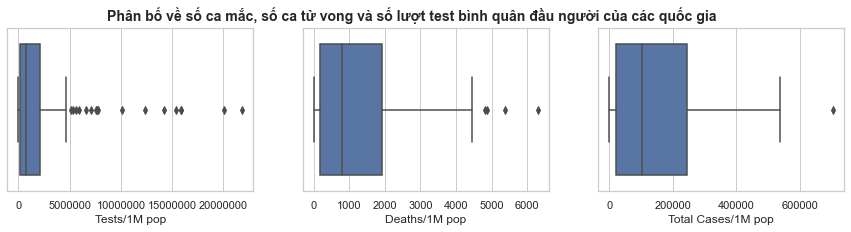

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

sns.boxplot(data=new_df, x='Tests/1M pop', ax=axes[0]).ticklabel_format(style='plain', axis='x')
sns.boxplot(data=new_df, x='Deaths/1M pop', ax=axes[1])
sns.boxplot(data=new_df, x='Total Cases/1M pop', ax=axes[2])
fig.suptitle(
    'Phân bố về số ca mắc, số ca tử vong và số lượt test bình quân đầu người của các quốc gia',
    fontsize=14,
    fontweight='bold'
)

plt.show()

# Pie chart

Như đã đề cập ở trên, mặc dù hầu hết các quốc gia trên thế giới có tỷ lệ hồi phục cao, tuy nhiên cũng có một số các quốc gia có tỷ lệ hồi phục thấp và rất thấp. Dưới đây là danh sách các nước có tỷ lệ hồi phục dưới 80%.

In [11]:
low_recovery_rate = new_df[new_df['Recovery rate'] < 0.8].sort_values(by='Recovery rate')
low_recovery_rate

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region,Death rate,Recovery rate,Active rate,Serious rate,Cases per test,Country Code
125,Martinique,153253,926.0,104.0,152223.0,8.0,408963,2471.0,828928.0,2212032.0,374736,North America,0.006042,0.000679,0.993279,0.000052,0.184881,MTQ
127,Guadeloupe,140130,854.0,2250.0,137026.0,19.0,350108,2134.0,938039.0,2343644.0,400248,North America,0.006094,0.016057,0.977849,0.000136,0.149386,GLP
199,Burundi,39794,38.0,773.0,38983.0,NaN,3175,3.0,345742.0,27583.0,12534450,Africa,0.000955,0.019425,0.979620,NaN,0.115097,BDI
36,Laos,207196,743.0,7660.0,198793.0,NaN,27746,99.0,1232128.0,164998.0,7467552,Asia,0.003586,0.036970,0.959444,NaN,0.168161,LAO
75,Finland,1023013,3939.0,46000.0,973074.0,24.0,184115,709.0,10720282.0,1929366.0,5556375,Europe,0.003850,0.044965,0.951184,0.000023,0.095428,FIN
201,Mayotte,37038,187.0,2964.0,33887.0,NaN,130058,657.0,176919.0,621246.0,284781,Africa,0.005049,0.080026,0.914925,NaN,0.209350,MYT
142,Saint Martin,10462,63.0,1399.0,9000.0,7.0,262436,1580.0,112382.0,2819064.0,39865,North America,0.006022,0.133722,0.860256,0.000669,0.093093,MAF
164,French Guiana,80859,395.0,11254.0,69210.0,2.0,258538,1263.0,627211.0,2005439.0,312755,South America,0.004885,0.139181,0.855934,0.000025,0.128918,GUF
105,Samoa,8995,16.0,1605.0,7374.0,4.0,44793,80.0,62450.0,310987.0,200812,Oceania,0.001779,0.178432,0.819789,0.000445,0.144035,WSM
90,Faeroe Islands,34658,28.0,7693.0,26937.0,5.0,704417,569.0,778000.0,15812687.0,49201,Europe,0.000808,0.221969,0.777223,0.000144,0.044548,FRO


Biểu đồ dưới đây so sánh về tỷ lệ hồi phục, tỷ lệ tử vong và tỷ lệ còn điều trị của một số quốc gia trên thế giới sử dụng biểu đồ tròn. Ta sử dụng biểu đồ tròn vì ta đang so sánh giữa các thành phần trong một tổng thể - số các ca mắc của mỗi nước (mỗi ca mắc ghi nhận đều thuộc 1 trong 3 trạng thái là còn điều trị, hồi phục hoặc tử vong). Để so sánh cơ cấu này giữa các quốc gia với nhau, ta vẽ nhiều biểu đồ tròn.

Vì có đến hơn 200 quốc gia nên ở đây ta chỉ chọn ra một vài nước để trực quan. Ở đây:
* Ta chọn Mỹ, Đức và Việt Nam đại diện cho các quốc gia có tỷ lệ hồi phục cao (> 80%). Vì hầu hết các nước trên thế giới đều có tỷ lệ hồi phục lớn, do đó biểu đồ tròn của các nước này cũng sẽ tương tự như ba nước Mỹ, Đức và Việt Nam.
* Các quốc gia còn lại được chọn trong danh sách các nước có tỷ lệ hồi phục thấp (< 80%).

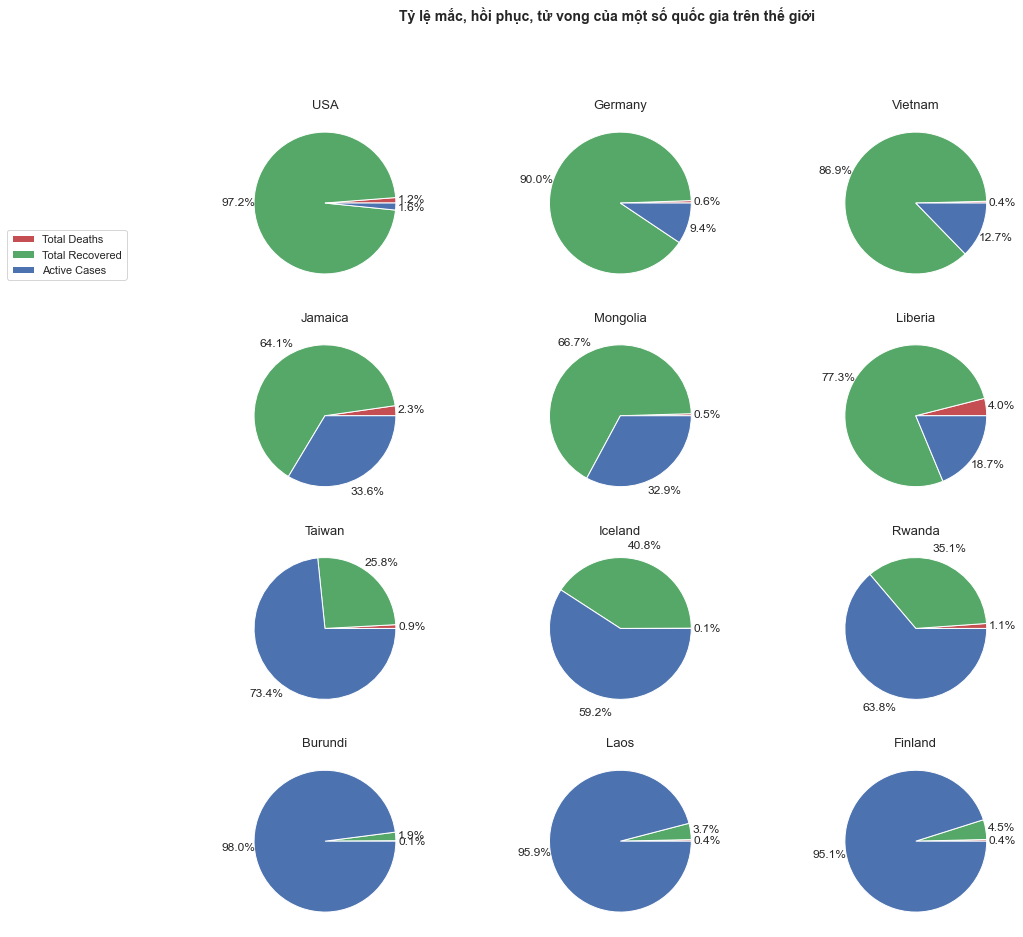

In [12]:
attrs = ['Total Deaths', 'Total Recovered', 'Active Cases']
selected_countries = ['USA', 'DEU', 'VNM', 'JAM', 'MNG', 'LBR', 'TWN', 'ISL', 'RWA', 'BDI', 'LAO', 'FIN']

fig, axes = plt.subplots(4, 3, figsize=(15, 15))
for i, c in enumerate(selected_countries):
    ax = axes[i//3][i%3]
    ax.pie(
        new_df[new_df['Country Code'] == c][attrs].values.flatten(),
        autopct='%1.1f%%',
        colors=['r', 'g', 'b'],
        pctdistance=1.225,
    );
    ax.set_title(new_df[new_df['Country Code'] == c]['Country'].values[0], fontdict={'fontsize': 13})

fig.legend(attrs, loc='center', bbox_to_anchor=[0, 0.75])
fig.suptitle(
    t='Tỷ lệ mắc, hồi phục, tử vong của một số quốc gia trên thế giới',
    fontsize=14,
    fontweight='bold',
)
plt.show()